<h1>Few-shot Learning</h1>

<p>Few-shot learning is a machine learning paradigm that enables a model to learn from only a small number of examples. To achieve this, few-shot learning algorithms use prior knowledge learned from other tasks and apply it to new tasks with limited training data. One popular approach to few-shot learning is prototypical networks, which were proposed by Snell et al. in <a href='https://arxiv.org/abs/1703.05175'>this</a> research paper. </p>



<h2>Outline</h2>
<ul>
    <li> Motivation: why few-shot learning is important </li>
    <li> Meta Learning: few-shot learning is a type of meta-learning </li>
    <li> Few-shot Learning: how to set up a few-shot learning in theory </li>
    <li> Implementation: implement Prototypical Networks to gain a better understanding of how few-shot learning works in practice </li>
    </ul>

<h2>Motivation</h2>
<p>When building a classifier, the general steps are collecting large number of labeled samples, training the model over them, and finally, test the model on a test set to see how well the model is generalized to unseen data. This paradaigm is not a good choice in the following scenarios:</p>
<ul>
    <li>A small dataset (e.g. a few examples of plant species) </li>
    <li>A large dataset with a long tail; that is, despite having a large dataset, for some classes, we only have a few examples</li>
    <ul>
        <li>Think about a large dataset of plants, for rare species, we only have a few examples. </li>
        <li>A database of user-searched keywords, some keywords might have been searched only 3,4 times</li>
    </ul>
</ul>
<p>When we have a small dataset, the model does not see enough variations of data features during training. Therefore, there might exist many combinations that the model has not seen before and consequently, it cannot be generalized well to unseen data.</p>
<p>One approach when dealing with the above issues is using pretrained networks. However, finetuning over a small dataset can impact the model accuracy and also lead to severe overfitting.</p>
<p>Few-shot learning aims to provide a solution when having not large enough dataset. In few-shot learning, the goal is to learn how to learn a task rather than learning the task itself. From this perspective, few-shot learning is a type of meta-learning.</p>


<h2>Meta Learning: Learning to Learn!</h2>
<p>
In traditional machine learning, a model is trained to perform a specific task, such as classifying images into a set of predefined categories. However, meta learning takes a different approach: it aims to teach the model how to learn, rather than just how to perform a specific task.

To accomplish this, meta learning involves training the model on multiple episodes of related tasks. In each episode, the model is presented with a new classification task and must adapt its parameters and strategies to perform well on that task. By training on a diverse set of tasks, the model can learn to quickly adapt to new tasks in the future.

Compared to traditional classification problems, meta learning typically involves working with sets of tasks rather than sets of data. This approach is often referred to as few-shot learning, as the model is trained to learn from only a few examples of each task.

Overall, meta learning is a powerful approach to machine learning that can lead to more flexible and adaptable models. By teaching models how to learn, we can build AI systems that are better equipped to handle new challenges and tasks.
</p>

<h2> Few-shot learning explained</h2>
<p>In a traditional classification problem, the model is trained to predict a class or label for a given sample image. During inference, the model can only classify images into the same set of classes that it was trained on, and cannot generalize to new classes. For example, if a model is trained to classify images as 'car' or 'airplane', it will not be able to classify a 'ship' image correctly, as it has not seen any 'ship' images before.

Few-shot learning takes a different approach, aiming to enable the model to generalize to unseen classes. In a few-shot learning scenario, the model is trained to learn how to learn a task, rather than just memorizing specific classes. To achieve this, the model is trained on multiple small classification tasks, each with a few labeled samples. For instance, given a dataset of images of cats, dogs, horses, and sheep, one task could be to classify cats vs. dogs, another could be dogs vs. horses, and so on.

By repeatedly training on a diverse set of classification tasks, the model learns to adapt to new tasks quickly and generalize to new classes. In the example above, if the model is trained on a few labeled images of ships, it should be able to classify a 'ship' image correctly, even though it was not explicitly trained on the 'ship' class.

Overall, few-shot learning is a powerful technique for enabling models to learn how to learn and generalize to new classes, which can lead to more flexible and adaptable AI systems.

 </p>


<h2>Few-shot learning setting: N-way-k-shot classification </h2>
<p>
    To train our model, we need to create episodes where it can learn to perform several tasks. Each task is essentially a small classification problem. To define a task, we first randomly sample $n$ classes (known as $n$-way) from our dataset. For example, let's say we choose the "dog" and "cat" classes from a set of samples that includes "dog", "cat", "horse", and "sheep". For each of the n classes, we then collect two sets of data: $k$ images to act as the training set (known as the support set), and $q$ images to act as the test set (known as the query set). 
    
   
<ul>
    <li>$k$ number (k-shots) of images to play the role of the training set. This set of images is called support set.</li>
    <li> $q$ number of images are sampled. This set of images is called query set. The query set plays the role of the test set.</li>
</ul>
</p>
<p> Here are some notes to remember:
    <ul>
        <li>An episode consists of multiple tasks.</li>
        <li>A few-shot learning problem with the above setting is known as $N$-way-$k$-shot classification.</li>
        <li>The value of $k$ (the number of shots or the size of the support set) is typically small - for example, just 5 -  because our ultimate goal is for the model to be able to accurately predict the class (which has not seen during the training) using only a few labeled samples from the support set.</li> 
    </ul>
     
</p>

<h2>Prototypical Networks</h2>
<p>Prototypical networks were proposed by Snell et al. as a solution to the problem of few-shot learning. At their core, prototypical networks are a type of representation learning. They learn a metric space in which the classification task can be performed. Before we proceed any further, let's take a moment to define what we mean by a metric space. 
</p>
<h3>Metric Space</h3>
<p>
A metric space is a collection of points, where we can define a metric, or in other words, a measure of distance between any two points. By creating an embedding or metric space, prototypical networks enable few-shot learning by allowing the classification of new data points based on their similarity to a few labeled examples.
</p>
<p>
    In mathematics, a metric space $X$ is a set of points over which we can define a metric $d$ or a distance function. $d$ is a function defined as $d: X\times X \rightarrow \mathbb R$  that satisfies three conditions for all $x, y, z \in X$:
    $$d(x,y) = 0 \Longleftrightarrow x=y$$
    $$d(x,y) = d(y,x)$$
    $$d(x,y) \le d(x,z) + d(z,y) $$
These conditions describe three fundamental properties of a metric space. First, the distance between a point and itself is zero. Second, the distance between two points, $x$ and $y$, is the same regardless of whether we start from x or y. Finally, the distance between two points via a direct path is less than or equal to the distance between those points if we pass through an intermediate point. 
</p>
<p>
With a clear definition for distance in hand, we can now define a measure of similarity between points. Simply put, the closer two points are to each other based on the distance metric we have defined, the more similar they are considered to be.
</p>

<h3>The core idea in prototypical networks </h3>
<p>
    Prototypical networks work under the assumption that there is a representation space in which all the points that belong to the same class gather around a common prototype. To achieve this, the network uses a non-linear mapping of the input to create an embedding space. The prototype for each class is defined as the mean of the support set in the embedding space. To classify a new data point, the network calculates its embedding and assigns it to the nearest prototype. This approach enables the network to perform few-shot learning by using a small support set of labeled examples to create prototypes that can classify new, unlabeled data points.
</p>

<h3>Data Preperation </h3>

<p>To demonstrate how to build, train, and test a prototypical network, I used the <a href='https://github.com/brendenlake/omniglot'>Omniglot dataset</a>. This dataset comprises handwritten images of 1623 characters from 50 different alphabets. As stated by the authors, the dataset is split into a background set containing 30 alphabets, which is used for training, and an evaluation set containing 20 alphabets, which is used for evaluation.
    </p>

In [1]:
import torch
from torch import nn
from torchvision.models import resnet18
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import Omniglot
from matplotlib import pyplot as plt
from random import sample
import numpy as np

In [2]:
image_size = 28
train_set = Omniglot(
    root= 'data',
    transform=transforms.Compose(
        [
            transforms.Grayscale(num_output_channels=3),
            transforms.RandomResizedCrop(image_size),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor()

        ]
    ),
    background=True,
    download=False
)

test_set = Omniglot(
    root = 'data',
    background=False,
    transform = transforms.Compose(
        [
        transforms.Grayscale(num_output_channels = 3),
        transforms.Resize([int(image_size * 1.15), int(image_size * 1.15)]),
            transforms.CenterCrop(image_size),
            transforms.ToTensor(),

        ]
    ),
    download=False
)
unique_labels = set()
for im in train_set._flat_character_images:
    unique_labels.add(im[1])




<p>Here is one sample image:</p>

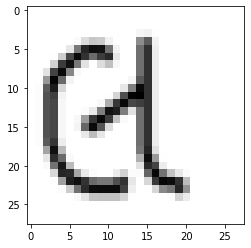

In [3]:
plt.imshow(train_set[1][0].permute(1, 2, 0) )
plt.show()

<p>I also organized the dataset into a dictionary to sample the classes and the images more easily. Labels or classes are also organized into a set.</p>

In [4]:
#Organize data in dictionary to be used for sampling.
# The keys are classes
data_dict = {}
for x in train_set:
    if x[1] not in data_dict:
        data_dict[x[1]] = []
    data_dict[x[1]].append(x[0])
    
#set of labels
labels = [x[1] for x in train_set]
labels = set(labels)

<h3>Preparing episodes</h3>
<p>Now that we have the dataset ready, we must prepare episods. That is, we must sample a set of classes, and break down the dataset into the support sets and the query sets. Please note that similar to the training phase of every deep learning model being performed iteratively through different epochs, training of a prototypical model is performed iteratively through multiple episodes. </p>
<p>The custom collate function accepts the number of ways (classes), the number of shots (the size of the support set), and the number of the quary set as parameters and returns the support set, the quary set and their labels.</p>

In [5]:
def custom_collate(n_way,n_shot,n_query):
    """

    :param n_way: number of classes in each episode
    :param n_shot: size of the support set
    :param n_query: size of the quary set
    :return:
            support_images: torch tensor
            quary_images: tocrh tensor
            support_labels: torch tensor
            quary_labels: torch tensor
            classes: torch tensor
            true_support_labels: torch tensor
            true_quary_labels: torch tensor

    """


    classes = sample(labels, n_way)
    support_images = torch.empty(n_way*n_shot*3*28*28).reshape((n_way,n_shot,3,28,28))
    quary_images = torch.empty(n_way*n_quary*3*28*28).reshape((n_way,n_quary,3,28,28))
    support_labels = []
    quary_labels = []
    true_support_labels = []
    true_quary_labels = []
    for i in range(n_way):
        images_per_class=sample(data_dict[classes[i]],n_shot+n_query)
        # plt.imshow(images_per_class[:5][4].permute(1, 2, 0))
        # plt.show()
        support_images[i] = torch.stack(images_per_class[:n_shot])

        quary_images[i] = torch.stack(images_per_class[n_shot:])
        support_labels = support_labels + (n_shot) * [i]
        quary_labels = quary_labels + (n_quary) * [i]
        true_support_labels = true_support_labels + (n_shot)*[classes[i]]
        true_quary_labels = true_quary_labels + (n_quary)*[classes[i]]

    support_labels = torch.tensor(support_labels)
    quary_labels = torch.tensor(quary_labels)
    true_support_labels = torch.tensor(true_support_labels)
    true_quary_labels = torch.tensor(true_quary_labels)

    return support_images,quary_images,support_labels,quary_labels,classes,true_support_labels,true_quary_labels



<h3>Build a prototypical network</h3>
<p>
 A prototypical network needs a CNN network as the backbone. This CNN network maps every image to a feature vector or an embedding vector. In other words, every image is mapped to a point in the metric space that the prototypical network has learnt (or is learning if we are still in the training phase). These embeddigs are used then to see how similar or disimilar are the images. Inputs of the network are images from support sets and query sets.
I chose resnet18 to be the backbone.
</p>

<p>Now that all requirements are ready, we can build the network. I used pytorch nn.Module to build the network.</p>

In [6]:
#-----Prototypical Network-----
class Prototypical(nn.Module):
    def __init__(self, backbone_network):
        super(Prototypical,self).__init__()
        self.backbone = backbone_network
    def forward(self,support_images,quary_images,n_way,n_shot):
        support_embedding = backbone_network.forward(support_images)
        class_proto = support_embedding.view((n_way, n_shot, -1)).mean(1)
        quary_embedding = backbone_network.forward(quary_images)
        probs = torch.cdist(quary_embedding, class_proto)
        predicted_class_number = probs.argmin(dim=1)
        predicted_labels = torch.tensor([classes[i] for i in predicted_class_number])
        return -probs,predicted_labels

<p>It is time to train the model:</p>

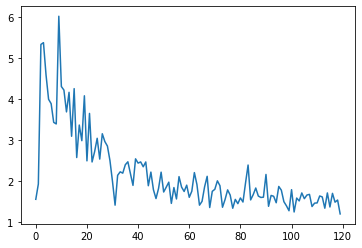

In [7]:
# -----Choose a model to be the backbone------
backbone_network = resnet18(pretrained=True)
backbone_network.fc = nn.Flatten()

#--Prototypical model-----
model = Prototypical(backbone_network)
model.train()
counter = 0
episods = 120
n_way = 5
n_shot = 5
n_quary = 10
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
loss_list = []
for episode in range(episods):
    support_images, quary_images, support_labels, quary_labels,classes,true_support_labels,true_quary_labels= custom_collate(n_way,n_shot,n_quary)
    quary_images = quary_images.reshape((-1,3,28,28))
    support_images = support_images.reshape((-1,3,28,28))
    optimizer.zero_grad()
    predicted_scores,predicted_labels = model(support_images,quary_images,n_way,n_shot)
    loss = criterion(predicted_scores,quary_labels)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
plt.plot(loss_list)
plt.show()


<h2>Conclusion</h2>
<p>In this article, I provided an introduction to the concept of few-shot learning and offered an example using prototypical networks. Few-shot learning is a subfield of machine learning that focuses on developing algorithms that can generalize to new tasks with very limited training data.
<br/>
 Prototypical networks are one such approach to few-shot learning that involve learning a feature embedding space for the input data, followed by computing class prototypes as the mean of the embeddings for each class. During inference, the distance between the query point and each class prototype is used to assign a label to the query.
<br/>    
        I highly recommend interested readers to check out the original research paper that proposed prototypical networks. The paper is well written and provides a detailed explanation of the approach, along with experiments demonstrating its effectiveness on few-shot learning tasks. </p>

<h2>More to Read</h2>
<a href='https://arxiv.org/pdf/1703.05175.pdf'>Prototypical Networks for Few-shot Learning</a>